In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [7]:
def lineal(x, a, b):
    return a*x + b
def coef_determinacion(observaciones, predicciones):
    residuo = observaciones - predicciones
    ss_res = np.sum(residuo**2)
    ss_tot = np.sum((observaciones - np.mean(observaciones))**2)
    r_cuadrado = 1 - (ss_res/ss_tot)
    return r_cuadrado
def regresion(modelo, x, y):
    # No puede haber nungún NaN
    ajuste, covarianzas = curve_fit(modelo, x, y)
    predicciones = modelo(x, *ajuste)
    errores = np.sqrt(np.diag(covarianzas))
    r_cuadrado = coef_determinacion(y, predicciones)
    return predicciones, ajuste, errores, r_cuadrado

def metadata(titulo, ejex, ejey):
    plt.title(titulo, fontsize = 60, fontweight='bold')
    plt.xlabel(ejex, fontsize = 35)
    plt.ylabel(ejey, fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    return
def cifras_signif(i, cifras):
    return str('{:g}'.format(float('{:.{p}g}'.format(i, p = cifras))))
def grafico_modelo(x, y, predicciones, ajuste, errores, r_cuad):
    plt.plot(x, y, 'bo')
    plt.plot(x, predicciones, 'r-',
             label = (' a = ' + cifras_signif(ajuste[0], 2)
                      + 'std_a = ' + cifras_signif(errores[0], 2) + '\n'
                      + ' b = ' + cifras_signif(ajuste[1], 2)
                      + ' std_b = ' + cifras_signif(errores[1], 2) + '\n'
                      + ' R^2 = ' + cifras_signif(r_cuad, 2)
                     )
             )
    plt.legend(fontsize = 20)
    return

def regresion_y_grafico(modelo, x, y, titulo, xlabel, ylabel):
    predicciones, ajuste, errores, r_cuadrado = regresion(modelo, x, y)
    scatter = plt.figure(figsize = (18, 9))
    metadata(titulo, xlabel, ylabel)
    grafico_modelo(x, y, predicciones, ajuste, errores, r_cuadrado)
    return scatter

In [3]:
datos = pd.read_csv(
    'C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\Ej_2.txt',
    delimiter = ' ',
    decimal = '.'
    )

In [4]:
datos.head()

,Anio,Rendimiento_nativo(QQ/ha),Rendimiento_hibrido(QQ/ha),Precipitacion_anual(mm)
0,1965,11.8,30.7,1029
1,1966,19.8,36.4,1745
2,1967,14.9,30.8,1026
3,1968,21.2,37.9,1063
4,1969,16.8,36.0,1332


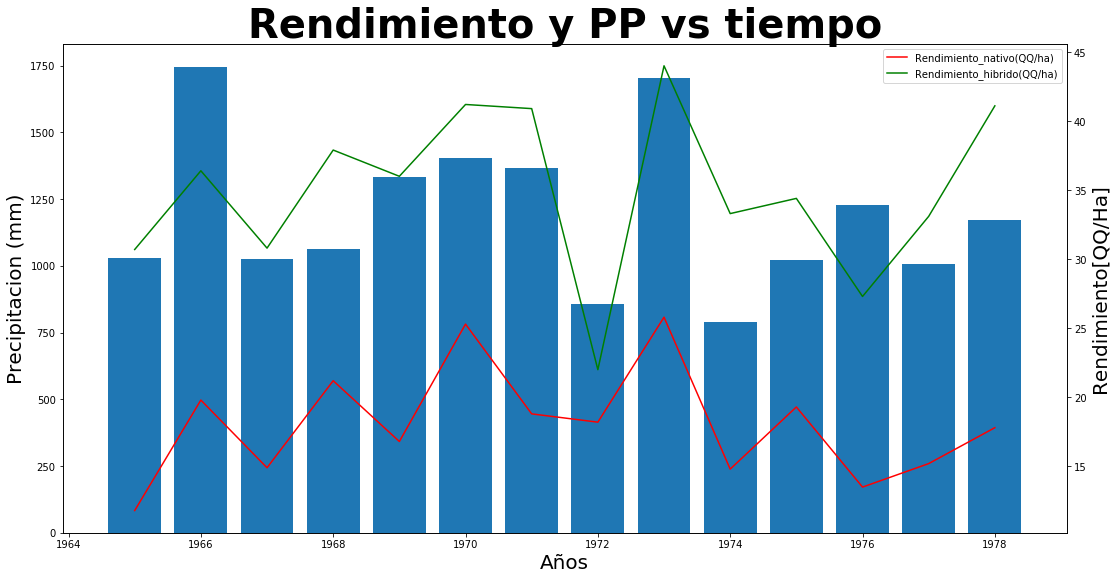

In [5]:
rendimiento, ax1 = plt.subplots(figsize = (18, 9))
metadata('Rendimiento y PP vs tiempo', 'Años', 'Precipitacion (mm)')
plt.bar(
    datos['Anio'],
    datos['Precipitacion_anual(mm)'],
    )
ax2 = ax1.twinx()
ax2.set_ylabel('Rendimiento[QQ/Ha]',
               fontsize = 20
              )
plt.plot(
    datos['Anio'],
    datos['Rendimiento_nativo(QQ/ha)'],
    'r-'
    )
plt.plot(
    datos['Anio'],
    datos['Rendimiento_hibrido(QQ/ha)'],
    'g-'
    )
plt.legend()

In [10]:
np.corrcoef(datos['Precipitacion_anual(mm)'], datos['Rendimiento_nativo(QQ/ha)'])

array([[1.        , 0.58762865],
       [0.58762865, 1.        ]])

In [11]:
np.corrcoef(datos['Precipitacion_anual(mm)'], datos['Rendimiento_hibrido(QQ/ha)'])

array([[1.        , 0.62131407],
       [0.62131407, 1.        ]])

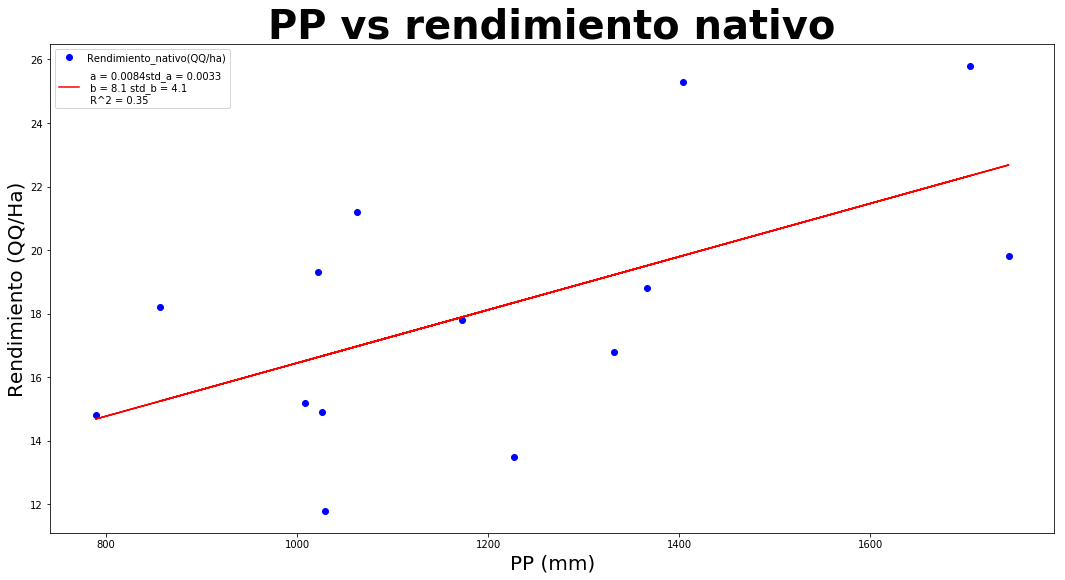

In [6]:
r_n = regresion_y_grafico(lineal, datos['Precipitacion_anual(mm)'], datos['Rendimiento_nativo(QQ/ha)'],
                          'PP vs rendimiento nativo', 'PP (mm)', 'Rendimiento (QQ/Ha)')

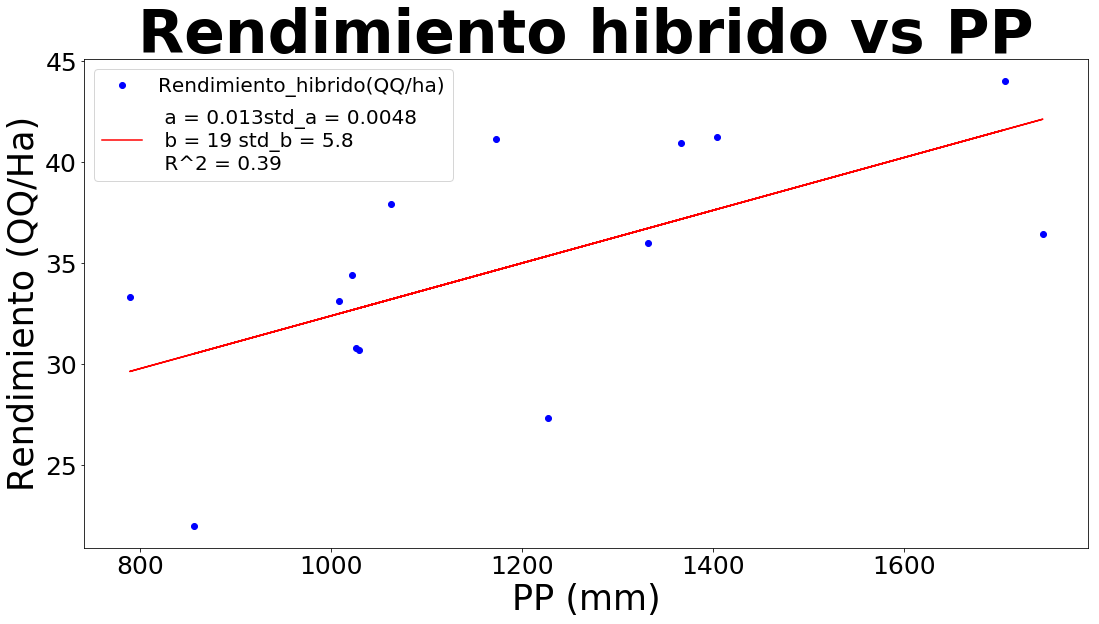

In [8]:
r_h = regresion_y_grafico(lineal, datos['Precipitacion_anual(mm)'], datos['Rendimiento_hibrido(QQ/ha)'],
                          'Rendimiento hibrido vs PP', 'PP (mm)', 'Rendimiento (QQ/Ha)')

In [9]:
r_h.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\rend_vs_PP.png')